x(t) 를 주파숩ㅁ녀환하면 F(w) - 푸리에변환  
x(n)을 주파수하면 x(z) - z 변환  



x[n] -> x(z)  
z[n-1] <-> z ^ -1 x(z)

y(t) = x(t) * h(t)  
Y(w) = X(w) * H(w)  
H(w) = Y(w) / X(w)  
H(z) = Y(z) / X(z)

입출력 관계를 줬으니 h(n) 을 구해야한다~~

[0.5        0.41666667 0.13888889 0.0462963 ]


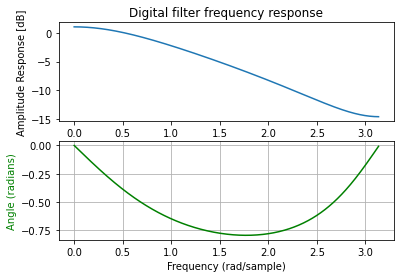

In [6]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

x = np.array([1., 0., 0., 0.])
b = np.array([1.0/2, 1.0/4])
a = np.array([1.0, -1.0/3])

y = signal.lfilter(b, a, x)
print(y) # [ 0.5 0.41666667 0.13888889 0.0462963 ]

w, h = signal.freqz(b, a) #주파수영역 응답
Mag = 20*np.log10(np.abs(h))
Ang = angles = np.unwrap(np.angle(h))
#고주파에 많이 깎아내서, LOW PASS FILTER다

plt.title('Digital filter frequency response')
plt.subplot(211)
plt.plot(w, Mag)
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency (rad/sample)')
plt.subplot(212)
plt.plot(w, Ang, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

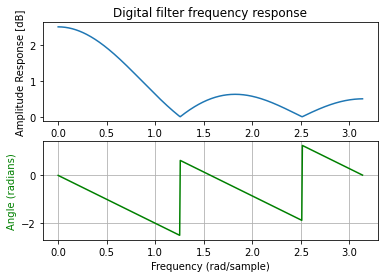

In [11]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

x = np.array([1., 0., 0., 0.])
b = np.array([1.0/2, 1.0/2, 1.0/2, 1.0/2, 1.0/2,])
a = np.array([1.0])
y = signal.lfilter(b, a, x)

w, h = signal.freqz(b, a) #주파수영역 응답
#Mag = 20*np.log10(np.abs(h))

Mag = np.abs(h)
Ang = angles = np.unwrap(np.angle(h))
#고주파에 많이 깎아내서, LOW PASS FILTER다

plt.title('Digital filter frequency response')
plt.subplot(211)
plt.plot(w, Mag)
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency (rad/sample)')
plt.subplot(212)
plt.plot(w, Ang, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

### 이렇게 구할줄 알아야함

1. H(Z)
2. x[n[ = 델타[n] 0<n<10
h[n]을 구하시오
3. Lfilter로 y[n]=2 
4 . freq를 이용해서 mag 랑 amplitude 그려라.
5. h[n] 을 이용해서 y[n]을 구해라 (컨볼루션). 같은지 그림으로 확인하라.

### <23.10.18>

IIR은 x의 길이에 따라 h 값도 달라짐. x가 무한대면 h 도 무한대  
FFR 은 y가 없어서, x에 상관없이, x앞에 붙은 계수로 h의 길이가 정해짐.  
p.5에 Usage : h = signal.lfilter(numtaps , cutoff, pass_zero) 이거 lfilter가 아니고 , firwin임  

DC Gain = 0에서의 값.  
lfilter는 x[n]의 길이 =  y[n]의; 길이  
x 콘볼루션 h는 len(x) + len(h)-1임다

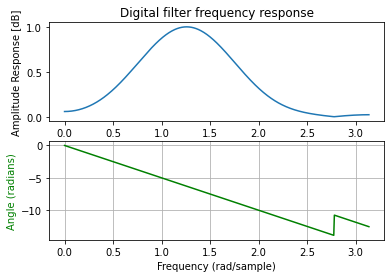

In [8]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

f1 = 0.3
f2 = 0.5
numtaps = 11

b = signal.firwin(numtaps, [f1,f2], pass_zero=False) # Lowpass filter
a = np.array([1,0])

w, h = signal.freqz(b, a) #주파수영역 응답

Mag = np.abs(h)
Ang = angles = np.unwrap(np.angle(h))

plt.title('Digital filter frequency response')
plt.subplot(211)
plt.plot(w, Mag)
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency (rad/sample)')
plt.subplot(212)
plt.plot(w, Ang, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

정현파 x[n]의 fs = 10KHz, f1 =500hz, f2=2khz의 성부능ㄹ 가지고 있다. 이때 2의 값을 날리라옹. LOWPass filter 사용함돵.. ㅜ